In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
def trapeze_method(h, f):
    n = len(f)

    sum = f[0]
    for i in range(1, n-1):
        sum += 2*f[i]
    sum += f[n-1]
    trapm = h * (sum / 2)
    return trapm

In [3]:
def simpson_13(h, f):
    n = len(f)

    sum = f[0]
    for i in range(1, n-2, 2):
        sum += 4*f[i] + 2*f[i+1]
    sum += 4*f[n-2] + f[n-1]

    return h * sum/3

In [4]:
def simpson_38(h, f):
    return 3 * h * (f[0] + 3 * (f[1] + f[2]) + f[3]) / 8

In [5]:
def simpson_38m(start, end, m, f):
    """
        Link para o método: https://www.codesansar.com/numerical-methods/integration-simpson-3-8-method-algorithm.htm
    """
    h = (end - start) / m

    result = f[0] + f[-1]

    for i in range(1, m):
        if i%3 == 0:
            result += 2*f[i]
        else:
            result += 3*f[i]
    result *= 3 * h / 8

    return result

In [6]:
def euler_method(lower_bound, upper_bound, y0, n, f):
    h = (upper_bound - lower_bound) / n

    x = lower_bound
    y = y0

    vetX = np.arange(n+1, dtype=float)
    vetY = np.arange(n+1, dtype=float)

    vetX[0] = x
    vetY[0] = y

    fxy = f(x, y)
    for i in range(1, n+1):
        x = lower_bound + i * h
        y += h * fxy

        fxy = f(x, y)

        vetX[i] = x
        vetY[i] = y

    return vetX, vetY

In [7]:
def runge_kutta_method(lower_bound, upper_bound, y0, n, f):
    h = (upper_bound - lower_bound) / n

    xt = lower_bound
    yt = y0

    vetX = np.arange(n+1, dtype=float)
    vetY = np.arange(n+1, dtype=float)

    vetX[0] = xt
    vetY[0] = yt
    for i in range(1, n+1):
        x = xt
        y = yt
        k1 = f(x,y)

        x = xt + h/2
        y = yt + (h/2) * k1
        k2 = f(x, y)

        y = yt + (h/2) * k2
        k3 = f(x, y)

        x = xt + h
        y = yt + (h*k3)
        k4 = f(x, y)

        xt = lower_bound + i * h
        yt = yt + (h/6) * (k1 + 2*(k2 + k3) + k4)

        vetX[i] = xt
        vetY[i] = yt

    return vetX, vetY

In [8]:
def create_points(start, end, n):
    gap = (end - start) / n
    x = [start + i*gap for i in range(n+1)]

    return np.array(x), gap

# Exercício 1

In [9]:
start = 2
end = 5
m = 6

In [10]:
f = lambda x: 1/(x*np.log(x))

In [11]:
x, h = create_points(start, end, m)

fx = f(x)

## Questão A

In [12]:
trapeze_method(h, fx)

0.859456862410861

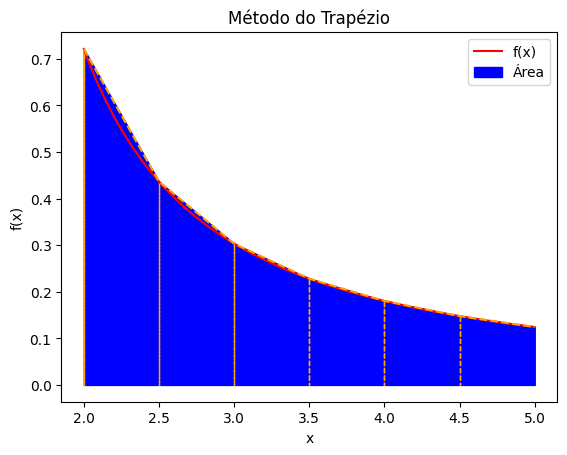

In [13]:
linsp = np.linspace(start, end, 1000)
plt.plot(linsp, f(linsp), color='red', label='f(x)')
plt.plot(x, fx, color='orange', linestyle='--')
plt.fill_between(x, 0, fx, color='blue', label='Área')
for i in range(m):
    plt.fill_between(x[i:i+1], 0, fx[i:i+1], color='orange', linestyle='--')
plt.title("Método do Trapézio")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

## Questão B

In [14]:
simpson_13(h, fx)

0.8437567467706143

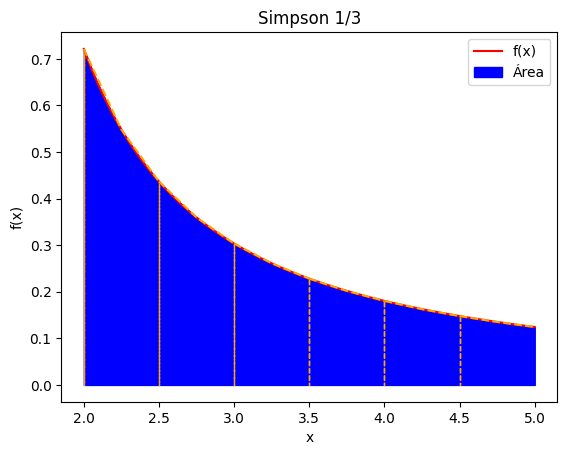

In [15]:
linsp = np.linspace(start, end, 1000)
plt.plot(linsp, f(linsp), color='red', label='f(x)')
plt.fill_between(linsp, 0, f(linsp), color='blue', label='Área')
for i in range(m):
    xi = [x[i], (x[i]+x[i+1])/2, x[i+1]]
    yi = f(xi)

    quad_interpol = interp1d(xi, yi, kind='linear')
    linsp = np.linspace(x[i], x[i+1], 100)

    plt.plot(linsp, quad_interpol(linsp), color='orange', linestyle='--',)
    plt.fill_between(x[i:i+1], 0, fx[i:i+1], color='orange', linestyle='--')
plt.title("Simpson 1/3")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

## Questão C

In [16]:
simpson_38m(start, end, m, fx)

0.8448499887110598

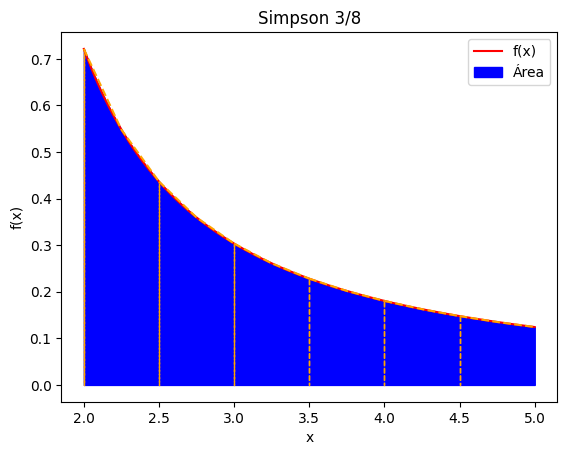

In [17]:
linsp = np.linspace(start, end, 1000)
plt.plot(linsp, f(linsp), color='red', label='f(x)')
plt.fill_between(linsp, 0, f(linsp), color='blue', label='Área')
for i in range(m):
    xi = [x[i], (x[i]+x[i+1])/2, x[i+1]]
    yi = f(xi)

    quad_interpol = interp1d(xi, yi, kind='linear')
    linsp = np.linspace(x[i], x[i+1], 100)

    plt.plot(linsp, quad_interpol(linsp), color='orange', linestyle='--',)
    plt.fill_between(x[i:i+1], 0, fx[i:i+1], color='orange', linestyle='--')
plt.title("Simpson 3/8")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

## Questão D

Tanto através dos gráficos quanto do resultado dos métodos, é perceptível que o Simpson 1/3 e o 3/8 obtiveram o valor mais próximo ao real da integral definida, o qual representa a área abaixo da curva, no gráfico, em azul. Isso se dá porque o método do trapézio estabelece uma reta entre as extremidades de cada subintervalo, enquanto que os demais se aproximam de uma curva não linear, melhor representando o comportamento da função integrada, em vermelho.

# Questão 2

In [18]:
start = 1
end = 2
m = 8

dy = lambda x, y: x**2 + y**2
y0 = 0

## Questão A

In [19]:
x_eu, y_eu = euler_method(start, end, y0, m, dy)

In [20]:
table = dict()
table['x'] = x_eu
table['y'] = y_eu
table['f(x,y)'] = dy(x_eu, y_eu)

pd.DataFrame(table)

,x,y,"f(x,y)"
0,1.000,0.000000,1.000000
1,1.125,0.125000,1.281250
2,1.250,0.285156,1.643814
3,1.375,0.490633,2.131346
4,1.500,0.757051,2.823127
5,1.625,1.109942,3.872596
6,1.750,1.594017,5.603389
7,1.875,2.294440,8.780081
8,2.000,3.391950,15.505327


In [21]:
x_rk, y_rk = runge_kutta_method(start, end, y0, m, dy)

In [22]:
table = dict()
table['x'] = x_rk
table['y'] = y_rk
table['f(x,y)'] = dy(x_rk, y_rk)

pd.DataFrame(table)

,x,y,"f(x,y)"
0,1.000,0.000000,1.000000
1,1.125,0.142066,1.285808
2,1.250,0.325451,1.668418
3,1.375,0.565747,2.210695
4,1.500,0.889976,3.042058
5,1.625,1.350279,4.463877
6,1.750,2.063418,7.320195
7,1.875,3.359401,14.801203
8,2.000,6.683613,48.670682
